## Lab Objective: 
Newton’s method, the classical method for finding the zeros of a function, is
one of the most important algorithms of all time. In this lab, we implement Newton’s method in
arbitrary dimensions and use it to solve a few interesting problems. We also explore in some detail
the convergence (or lack of convergence) of the method under various circumstances.

Note: I just wanted to use a different color map. I use viridis map.

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sy
import sympy as sp
import scipy.optimize as opt

## Problem 1 (Newton's Method in one dimension)

In [163]:
def g(f, x0, fprime, tol=1e-5, max=15):
    
    xi = x0
    err = tol + 1
    converged = False
    for i in range(1, max+1):
        xi1 = xi - f(xi) / fprime(xi)
        err = np.abs(xi1 - xi)
        xi = xi1
        if err < tol:
            converged =True
            break

    return xi, converged, i

In [164]:
def g1(x):
    return np.exp(x) - 2
def g1prime(x):
    return np.exp(x)
def g2(x):
    return x ** 4 - 3
def g2prime(x):
    return 4 * x ** 3


In [165]:
z1 = g(g1, 1, g1prime)
z1

(0.6931471805600254, True, 4)

In [166]:
z2 = g(g2, 1, g2prime)
z1_opt = opt.newton(g1, 1, g1prime)
z2_opt = opt.newton(g2, 1, g2prime)

In [167]:
print (z1,z2,z1_opt,z2_opt)

(0.6931471805600254, True, 4) (1.3160740129543826, True, 5) 0.6931471805599453 1.3160740129524924


In [168]:
print (z1-z1_opt)

[8.01581024e-14 3.06852819e-01 3.30685282e+00]


## Problem 3 (Backtracking and no convergence)

In [169]:
def g(f, x0, fprime, alpha, tol=1e-5, maxi=15):
    
    xi = x0
    err = tol + 1
    converged = False
    for i in range(maxi):
        xi1 = xi - alpha * f(xi) / fprime(xi)
        err = np.abs(xi1 - xi)
        xi = xi1
        if err < tol:
            converged = True
            break

    return xi, converged, i

f1 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
fprime1 = lambda x: (1./3) * np.power(np.abs(x), -2./3)

In [170]:
g1= g(f_1, .01, fprime_1, 1)

In [171]:
g2= g(f_1, .01, fprime_1, .4, maxi=100)
print (g1,g2)

(-327.6800000000003, False, 14) (6.400000000000134e-07, True, 5)


## Problem 4

In [172]:
def g(f, x0, fprime, tol=1e-5, maxi=15):
    
    alpha = np.linspace(.01, 1, 50)
    resu = np.zeros(len(alpha))
    
    for index, a in enumerate(alpha):
        xk = x0
        err = tol + 1
        for i in range(1, maxi+1):
            xk1 = xk - a * f(xk) / fprime(xk)
            err = np.abs(xk1 - xk)
            xk = xk1
            if err < tol:
                break
        resu[index] = i
    return resu

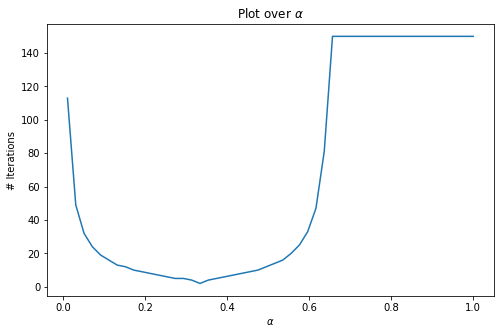

In [174]:
alpha = np.linspace(.01, 1, 50)
resu = g(f1, .01, fprime1, 1e-5,  maxi=150)
fig = plt.figure(figsize=(8,5))
plt.plot(alpha, resu)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'# Iterations')
plt.title(r'Plot over $\alpha$')
plt.show()

## Basins of Attraction (3rd order, 5th order, 7th Order)

In [175]:
def basin(f, fprime, zeros, bounds, res, iters):

    x_imag = np.linspace(bounds[2], bounds[3], res)
    x_real = np.linspace(bounds[0], bounds[1], res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    
    Xk = np.zeros((res,res), dtype=np.float64)
    for i in range(iters):
        X_1 = X_0 - f(X_0)/fprime(X_0)
        X_0 = X_1
    
    Y = np.fromiter((np.argmin(abs(zeros - i)) for i in X_1.ravel()), 
                    dtype=np.int64, count=res**2).reshape((res, res))

    fig = plt.figure(figsize=(8,5))
    plt.pcolormesh(x_real, x_imag, Y, cmap="viridis") #Could have used brg  

In [176]:
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
zeros = np.array([1, -.5 + 1j * np.sqrt(3) / 2, -.5 - 1j * np.sqrt(3) / 2])
bounds = np.array([-1.5, 1.5, -1.5, 1.5])

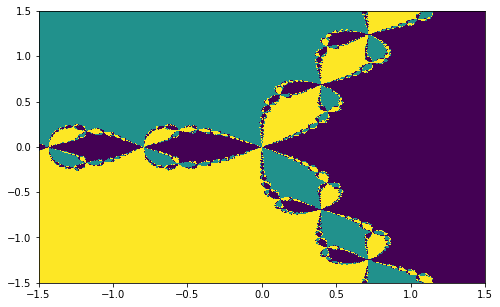

In [177]:
basin(f, Df, zeros, bounds, 500, 100)

In [178]:
f = lambda x: x**3 - x
Df = lambda x: 3*x**2 - 1
zeros = np.array([0, 1, -1])
bounds = np.array([-1.5, 1.5, -1.5, 1.5])

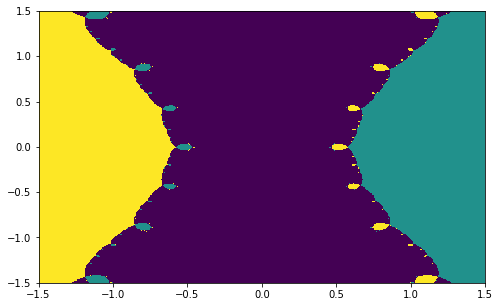

In [179]:
basin(f, Df, zeros, bounds, 500, 100)

In [180]:
f = lambda x: x**7 - x
Df = lambda x: 6*x**6 - 1
zeros = np.array([0, 1, -1])
bounds = np.array([-1.5, 1.5, -1.5, 1.5])

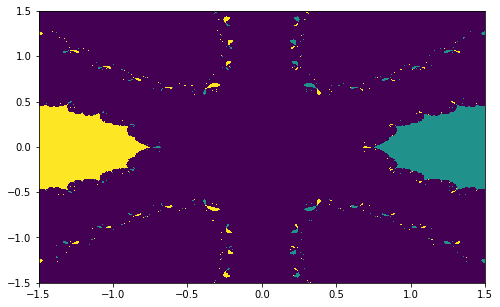

In [181]:
basin(f, Df, zeros, bounds, 500, 100)